# Logistic regression for iris

In [2]:
import numpy as np
from sklearn import datasets

In [3]:
source = datasets.load_iris()
print(source.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Model
We have $k$ classes and given observation $X$
$$ \mathbb{P}_p(Y=k \,\vert\, X) \propto e^{p_k^TX}$$ 
### Problem
We want to maximize log-likelohood:
$$p^\ast = \operatorname*{argmin}_p -\log P_p(X).$$

In [23]:
data = source.data
target = source.target

features = 4
classes = 3

design1 = data
design1 = np.c_[np.ones(len(target)), design1]
onehot = (np.arange(classes) == target[:, None])

learning_rate = 10**(-3)
no_steps = 5*10**4
params = np.zeros((features + 1,classes))
stopping_cond = 10**(-3)
loss_vec =[]

def activity( design1, params ):
    activation = design1 @ params
    return np.exp(activation) / np.sum(np.exp(activation), 1, keepdims = True)

def loss_fun( design1, params, onehot ):
    log = (-np.log(activity( design1, params )))
    return np.sum( log * onehot )

for epoch in range(no_steps):
    loss = loss_fun( design1, params, onehot )
    loss_vec = np.append(loss_vec, loss)
    grad = - design1.T @ ( onehot - activity( design1, params ) ) 
    params -= learning_rate * grad
    if(epoch > 2 and abs(loss_vec[-2]-loss_vec[-1]) < stopping_cond):
        break

2888 11.175782266081434


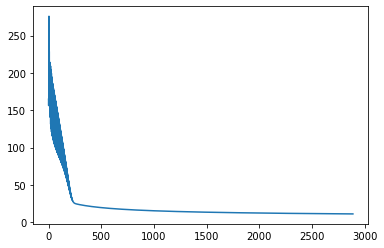

In [20]:
from matplotlib import pyplot as plt

print(epoch, loss)
plt.plot(range(len(loss_vec)), loss_vec)
plt.show()

In [21]:
np.round(activity( design1, params ),2)

array([[1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
 

In [22]:
value = np.argmax( activity(design1, params), 1)
hit = (value == target)
acc = np.mean(hit)
print(acc)

0.98
